In [1]:
import pandas as pd
import numpy as np

In [2]:
# read from API
"""
from sodapy import Socrata
client = Socrata("data.montgomerycountymd.gov", app_token='kcBMUe0h7nUcQBgfaeQkYsnSN')
df_police_stop = pd.DataFrame.from_records(client.get_all("4mse-ku6q"))
"""

# read from local
df_police_stop = pd.read_csv('Data/Traffic_Violations_20201003.csv'
                            ,parse_dates=['Date Of Stop'])

D:\software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,20,21,22,23,24,25,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', None)
df_police_stop.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,02 - Automobile,2014.0,HONDA,CIVIC,BLACK,Warning,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2016.0,FORD,TK,BLACK,Warning,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,06 - Heavy Duty Truck,2018.0,HINO,TRUCK,WHITE,Warning,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2008.0,HONDA,CIVIC,BLACK,Warning,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
4,54442b34-6511-4efd-b2fe-0536ae0d3f55,2019-07-13,12:11:00,MCP,"3rd District, Silver Spring",WINDOW TINT,GEORGIA/ BALLARD ST,39.000932,-77.033183,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2010.0,TOYOTA,COROLA,WHITE,ESERO,61,NaN,False,HISPANIC,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.0009316666667, -77.0331833333333)"


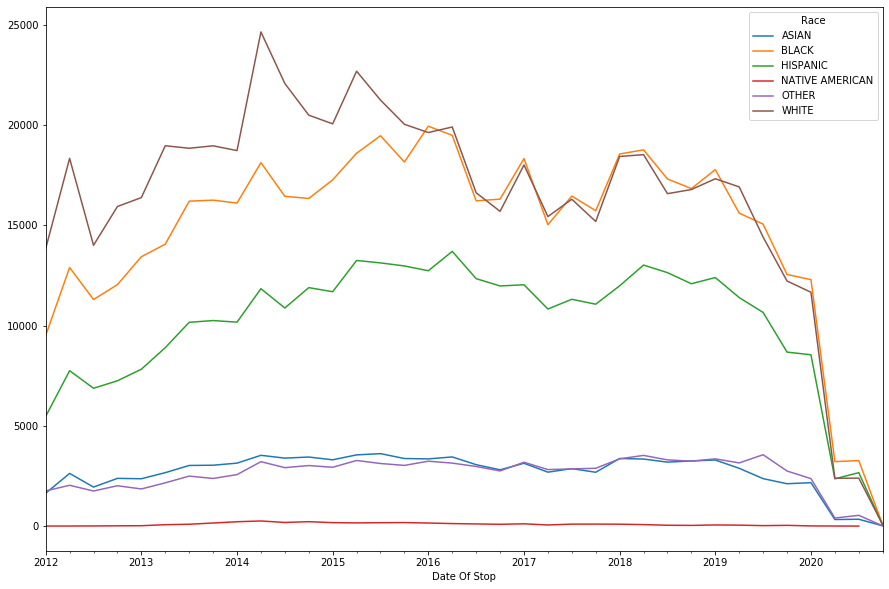

In [89]:
# race distribution; Look at year, quarter
df_police_stop['Date Of Stop'] = pd.to_datetime(df_police_stop['Date Of Stop'])
df_race_agg = df_police_stop.groupby([df_police_stop['Date Of Stop'].dt.to_period('Q'),'Race']).size()
df_race_agg = df_race_agg.reset_index(name='cnt')
df_race_agg_pivot = df_race_agg.pivot(index='Date Of Stop', columns='Race', values='cnt')
df_race_agg_pivot.plot(figsize=(15,10))

In [18]:
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles, MarkerCluster

m = Map(
    basemap=basemap_to_tiles(basemaps.OpenStreetMap.Mapnik),
    center=(39.083287, -77.149979),
    zoom=10
)

markers = []
location = df_police_stop[(df_police_stop['Date Of Stop'] >= '2020-10-01') & (df_police_stop['Latitude'] != 0.0)]\
        .filter(['Latitude','Longitude'])
for _,loc in location.iterrows():
    markers.append(Marker(location=(loc[0],loc[1])))

marker_cluster = MarkerCluster(
    markers=markers
)
    
# for mk in markers:
#     m.add_layer(mk)
m.add_layer(marker_cluster);

m

Map(center=[39.083287, -77.149979], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…